In [1]:
import os
from pathlib import Path
import numpy as np
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
import sys
from PIL import Image
sys.modules['Image'] = Image

In [4]:
p=Path("C:\\Users\\admin\\Desktop\\Datasets\\Images")

dirs=p.glob("*")

labels_dict={"cat":0,"dog":1,"horse":2,"human":3}
             
labels=[]
img_data=[]
for folder_dir in dirs:
    #print(folder_name)
    label=str(folder_dir).split("\\")[-1][:-1]
    #print(label)
    #now you have to iterate over every folder so.
    
    for img_path in folder_dir.glob("*.jpg"):
        #print(img_path)
        #now to read the image you can use opencv or keras
        img = image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        img_data.append(img_array)
        labels.append(labels_dict[label])
        
    

In [5]:
print(len(img_data))

16


In [6]:
print(len(labels))
print(labels)

16
[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]


In [7]:
#convert this data into a numpy array

In [8]:
img_data=np.array(img_data,dtype='float32')/255.0
labels=np.array(labels)

In [9]:
print(img_data.shape)
print(labels.shape)

(16, 32, 32, 3)
(16,)


In [10]:
#randomy shuffle your data

In [11]:
import random
combined=list(zip(img_data,labels))
random.shuffle(combined)

#unzip
img_data[:],labels[:]=zip(*combined)

In [12]:
#visualoze th data and shuffle the data before using it and import random

In [13]:
from matplotlib import pyplot as plt

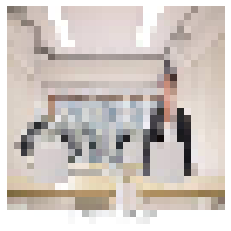

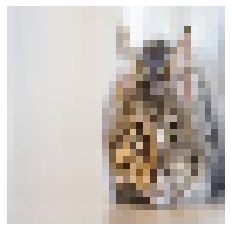

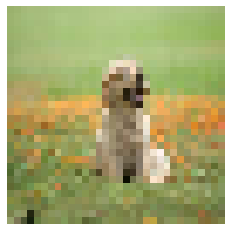

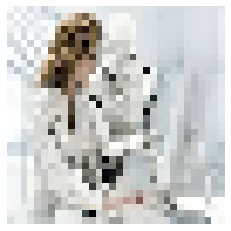

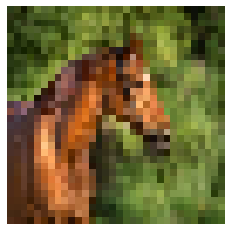

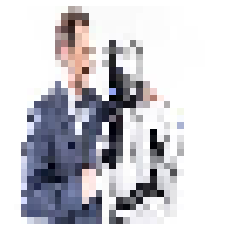

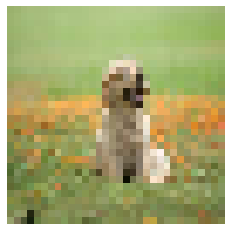

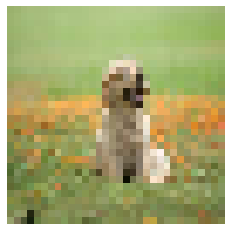

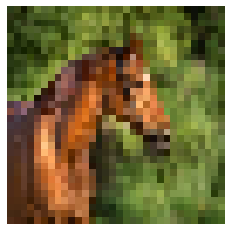

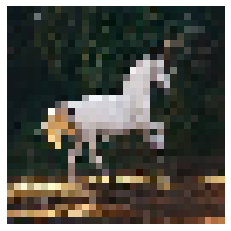

In [14]:
def drawing(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return
for i in range(10):
    drawing(img_data[i])
    

In [15]:
#SVM clasifier

In [16]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [17]:
#one vs one data
# we will need to convert the data for one v one

In [18]:
m=img_data.shape[0]
img_data=img_data.reshape(m,-1)
print(img_data.shape)
print(img_data)


(16, 3072)
[[0.4862745  0.44705883 0.4117647  ... 1.         1.         1.        ]
 [0.85882354 0.8627451  0.88235295 ... 0.8156863  0.80784315 0.8117647 ]
 [0.6039216  0.69411767 0.42745098 ... 0.5019608  0.5176471  0.28627452]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.85882354 0.8627451  0.88235295 ... 0.8156863  0.80784315 0.8117647 ]
 [0.6039216  0.69411767 0.42745098 ... 0.5019608  0.5176471  0.28627452]]


In [19]:
# here 3072 are the number of features we have

In [20]:
classes=len(np.unique(labels))
print(classes)
print(np.unique(labels))


4
[0 1 2 3]


In [21]:
#we will group the data points which are of the same class and then form a dict
#we create a dict where class labels are the key and all the data points as the value in the list.

In [22]:
def classWiseData(x,y):
    data = {}
    
    for i in range(classes):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [23]:
data = classWiseData(img_data,labels)
data



{0: array([[0.85882354, 0.8627451 , 0.88235295, ..., 0.8156863 , 0.80784315,
         0.8117647 ],
        [0.6039216 , 0.69411767, 0.42745098, ..., 0.5019608 , 0.5176471 ,
         0.28627452],
        [0.4862745 , 0.44705883, 0.4117647 , ..., 1.        , 1.        ,
         1.        ],
        [0.85882354, 0.8627451 , 0.88235295, ..., 0.8156863 , 0.80784315,
         0.8117647 ]], dtype=float32),
 1: array([[0.6039216 , 0.69411767, 0.42745098, ..., 0.5019608 , 0.5176471 ,
         0.28627452],
        [0.6039216 , 0.69411767, 0.42745098, ..., 0.5019608 , 0.5176471 ,
         0.28627452],
        [0.1764706 , 0.23921569, 0.09803922, ..., 0.2627451 , 0.3764706 ,
         0.11764706],
        [0.6039216 , 0.69411767, 0.42745098, ..., 0.5019608 , 0.5176471 ,
         0.28627452]], dtype=float32),
 2: array([[0.1764706 , 0.23921569, 0.09803922, ..., 0.2627451 , 0.3764706 ,
         0.11764706],
        [0.0627451 , 0.09803922, 0.11764706, ..., 0.7176471 , 0.4745098 ,
         0.28235295

In [24]:
print(type(data))

<class 'dict'>


In [25]:
data[0].shape[0]

4

In [26]:
# now we will make pair of data for svm
#combines data of 2 classes into one matrix

In [27]:

def getDataPairForSVM(d1,d2):
    """Combines Data of two classes into a signle matrix"""
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

In [28]:
#now we will feed our data to the svm classifier and then prediction 

In [29]:
print(data_pair.shape)

NameError: name 'data_pair' is not defined

In [35]:
mysvm=SVM()

In [44]:
def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(classes):
        svm_classifiers[i] = {}
        for j in range(i+1,classes):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mysvm.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
            
            
    
    return svm_classifiers
    

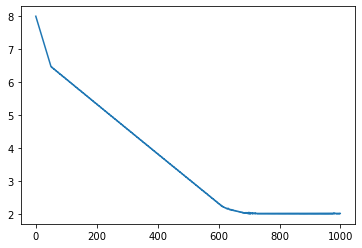

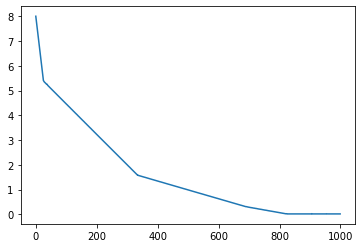

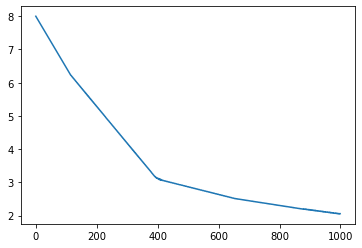

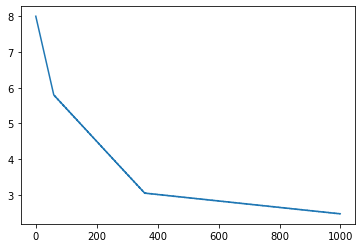

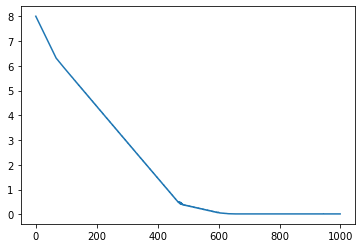

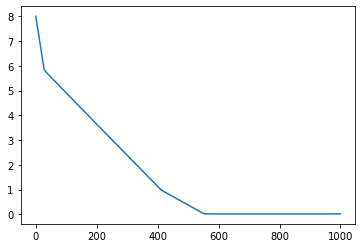

{0: {1: (array([[ 0.00081305,  0.00266541, -0.00166036, ..., -0.00337571,
           -0.00241866, -0.0071497 ]]),
   0.0068400000000000735),
  2: (array([[-0.00360231, -0.00302339, -0.00281671, ...,  0.00153752,
            0.00157408, -0.00184444]]),
   0.01080999999999985),
  3: (array([[ 0.00019029, -0.00070279,  0.00187393, ...,  0.00148527,
            0.00141903,  0.00352839]]),
   -8.000000000000062e-05)},
 1: {2: (array([[-0.00344978, -0.00341832, -0.0021875 , ...,  0.00302679,
            0.00228009,  0.0005019 ]]),
   0.007759999999999777),
  3: (array([[-0.00085982, -0.00284506,  0.00187815, ...,  0.00326616,
            0.00231636,  0.00738355]]),
   -0.004149999999999999)},
 2: {3: (array([[ 0.00160183,  0.00044699,  0.00171983, ..., -0.00272258,
           -0.00193176,  0.00253605]]),
   -0.007839999999999953)},
 3: {}}

In [45]:
svm_classifiers=  trainSVMs(img_data,labels)
svm_classifiers

In [ ]:
#you can try with only two class , to see if the loss is converging or diverginf and set the learning rate value as per that

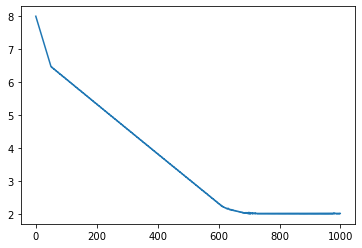

In [47]:
xp, yp  = getDataPairForSVM(data[0],data[1])
w,b,loss  = mysvm.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
plt.plot(loss)

In [49]:
print(loss)
#it is converginf which us correct

[8.0, 7.969455463816683, 7.938911538521035, 7.908368224100839, 7.877825520543875, 7.8472834278379295, 7.816741945970783, 7.78620107493022, 7.755660814704025, 7.7251211652799805, 7.694582126645868, 7.664043698789477, 7.6335058816985875, 7.602968675360987, 7.572432079764459, 7.5418960948967895, 7.511360720745764, 7.480825957299167, 7.450291804544787, 7.419758262470407, 7.389225331063816, 7.358693010312802, 7.328161300205147, 7.297630200728641, 7.267099711871071, 7.236569833620228, 7.206040565963895, 7.175511908889861, 7.144983862385916, 7.114456426439851, 7.083929601039451, 7.053403386172505, 7.022877781826805, 6.9923527879901375, 6.961828404650298, 6.931304631795069, 6.900781469412246, 6.870258917489618, 6.839736976014977, 6.809215644976113, 6.778694924360818, 6.748174814156883, 6.7176553143521, 6.68713642493426, 6.656618145891157, 6.626100477210585, 6.595583418880333, 6.565066970888196, 6.534551133221968, 6.50403590586944, 6.47352128881841, 6.470461157236221, 6.452237494538705, 6.45981

In [50]:
#Parameters for Cats and dogs
cats_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][3]
print(cats_dogs[0].shape)
print(cats_dogs[1])

(1, 3072)
0.0068400000000000735


In [51]:
#NOW WE WILL PREDICT AND CALCULTE THE ACCURACY

In [52]:
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [53]:
def predict(x):
    
    count = np.zeros((classes,))
    
    for i in range(classes):
        for j in range(i+1,classes):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [54]:
#accuracy

In [55]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [57]:

accuracy(img_data,labels)

0.8125

In [38]:
#now using sklearn classfier

In [215]:

from sklearn import svm

In [216]:

svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [217]:

svm_classifier.fit(img_data,labels)
svm_classifier.score(im_data,labels)

0.625

In [226]:
svm_classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)